# Modelling a local outbreak

* My Drive/GitHub/transmission_ms/local_outbreak.ipynb
* Checked in working order 31 Oct 2022
* From 211015_local_outbreak.ipynb

In [1]:
import coalestr as cs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def scenario(list_of_periods):
    
    def period(duration, N = None, Q = None, X = None, M = None):
    
        if type(N) in (int, float):
            output[start:start + duration, 0] = N
        
        elif type(N) is tuple:
            
            if N[0] == "lin":
                delta = N[1] - N_in_previous_period / duration
                for t in range(duration):
                    output[t, 0] = output[t - 1, 0] + delta    
    
            elif N[0] == "exp":
                R = np.exp(np.log(N[1] - N_in_previous_period) / duration)
                for t in range(duration):
                    output[t, 0] = output[t - 1, 0] * R                      

In [3]:
my_species = cs.species()
my_species.get_coalescent(show = False)
my_species.get_diversity(show = False)

In [4]:
history = [[1000, 2, 3, 0, 1],
           [2, 4, 3, 0, 1],
           [2, 8, 3, 0.1, 1],
           [2, 16, 3, 0.2, 1],
           [2, 32, 3, 0.3, 1],
           [2, 64, 3, 0.4, 1],
           [10, 128, 3, 0.5, 1]]

observe = range(50)

my_village = cs.Population(history, metapopulation = my_species)
my_village.get_coalescent(observe, show = True)

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0     13619.8   7766.4
        1             100.0     100.0     13609.1   7759.1
        2             100.0     100.0     13598.2   7750.2
        3             100.0     100.0     13587.2   7738.1
        4             100.0     100.0     13575.9   7719.1
        5             100.0     100.0     13564.6   7685.2
        6             100.0     100.0     13553.4   7619.3
        7             100.0     100.0     13542.6   7483.8
        8             100.0     100.0     13533.0   7197.2
        9             100.0     100.0     13526.5   6582.3
       10             100.0     100.0     13516.8   6323.4
       11             100.0     100.0     13512.2   5806.2
       12             100.0     100.0     13508.9   5668.6
       13             100.0     100.0     13510.9   5408.0
       14             100.0     100.0     13525.0   55

In [5]:
my_village.get_diversity(show = True)

Please get_diversity() for the metapopulation and try again.
Observation time.    SNP heterozygosity.   Haplotype homozygosity at 27.0 kb locus
                      beho       wiho           beho       wiho
       49           2.91e-04   2.04e-04       2.83e-01   4.92e-01
       48           2.91e-04   2.04e-04       2.76e-01   4.82e-01
       47           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       46           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       45           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       44           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       43           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       42           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       41           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       40           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       39           2.91e-04   2.04e-04       2.75e-01   4.82e-01
       38           2.91e-04   2.04e-04       2.75e-01   4.82e-01


In [6]:
my_village.get_segments(show = True)

Shared haplotype segments of 2 units or more, in a chromosome of length 100 units
where one unit is 13.50 kilobases

Observation time         Between host                   Within host
                       omega  sigma   mean kb         omega  sigma   mean kb
       49               2.86   0.82    388.21          3.05   0.92    405.98
       48               3.45   0.87    340.21          3.58   0.94    356.08
       47               3.65   0.87    321.62          3.79   0.94    336.71
       46               3.70   0.87    317.26          3.84   0.94    332.07
       45               3.71   0.87    316.35          3.85   0.94    331.10
       44               3.71   0.87    316.17          3.85   0.94    330.90
       43               3.71   0.87    316.13          3.85   0.94    330.86
       42               3.71   0.87    316.12          3.85   0.94    330.86
       41               3.71   0.87    316.12          3.85   0.94    330.85
       40               3.71   0.87    316.12

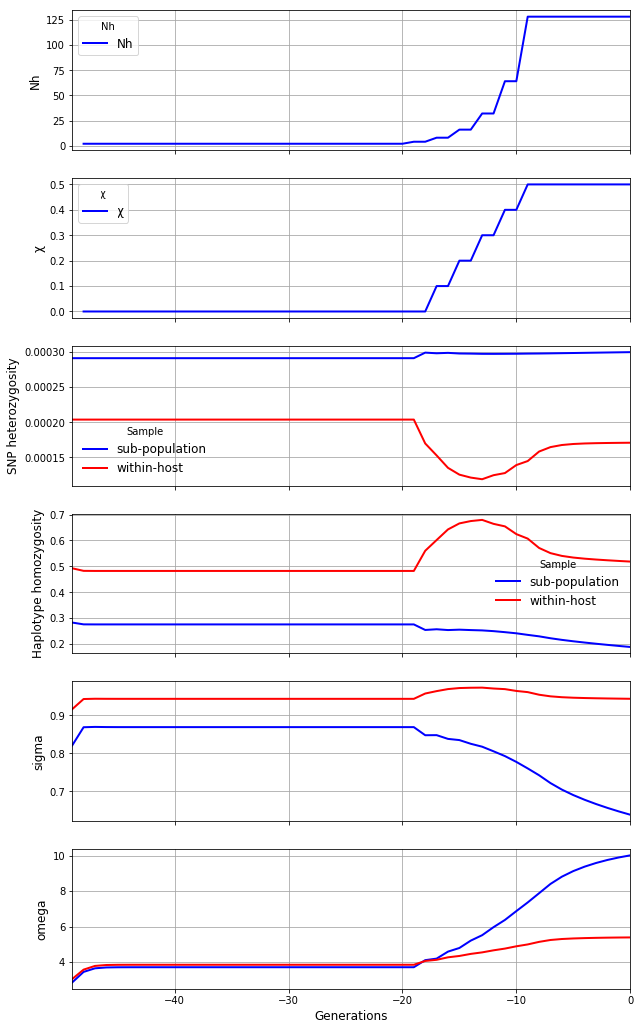

In [7]:
my_village.plot_observations(metrics = ("Nh", "chi", "snp_het", "hap_hom", "sigma", "omega", ))